In [2]:
conda install squidpy


Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/osx-64::leidenalg==0.9.1=py39h7a8716b_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/osx-64::leidenalg==0.9.1=py39h7a8716b_0
done

## Package Plan ##

  environment location: /Users/denverncube/opt/anaconda3

  added / updated specs:
    - squidpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aiohttp-3.8.4              |   py39ha30fb19_0         408 KB  conda-forge
    asciitree-0.3.3            |             py_2           6 KB 

In [3]:
import scanpy as sc
import squidpy as sq

import numpy as np

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.seqfish()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.1 pynndescent==0.5.8
squidpy==1.2.2


  0%|          | 0.00/30.7M [00:00<?, ?B/s]

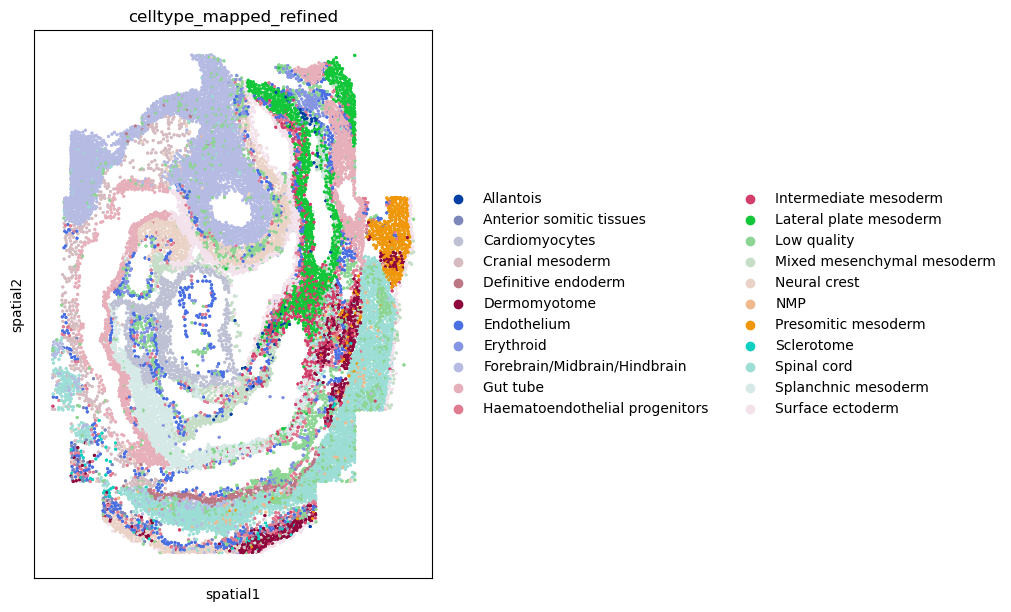

In [4]:
#First, let’s visualize cluster annotation in spatial context with squidpy.pl.spatial_scatter().
sq.pl.spatial_scatter(adata, color="celltype_mapped_refined", shape=None, figsize=(10, 10))

  0%|          | 0/1000 [00:00<?, ?/s]

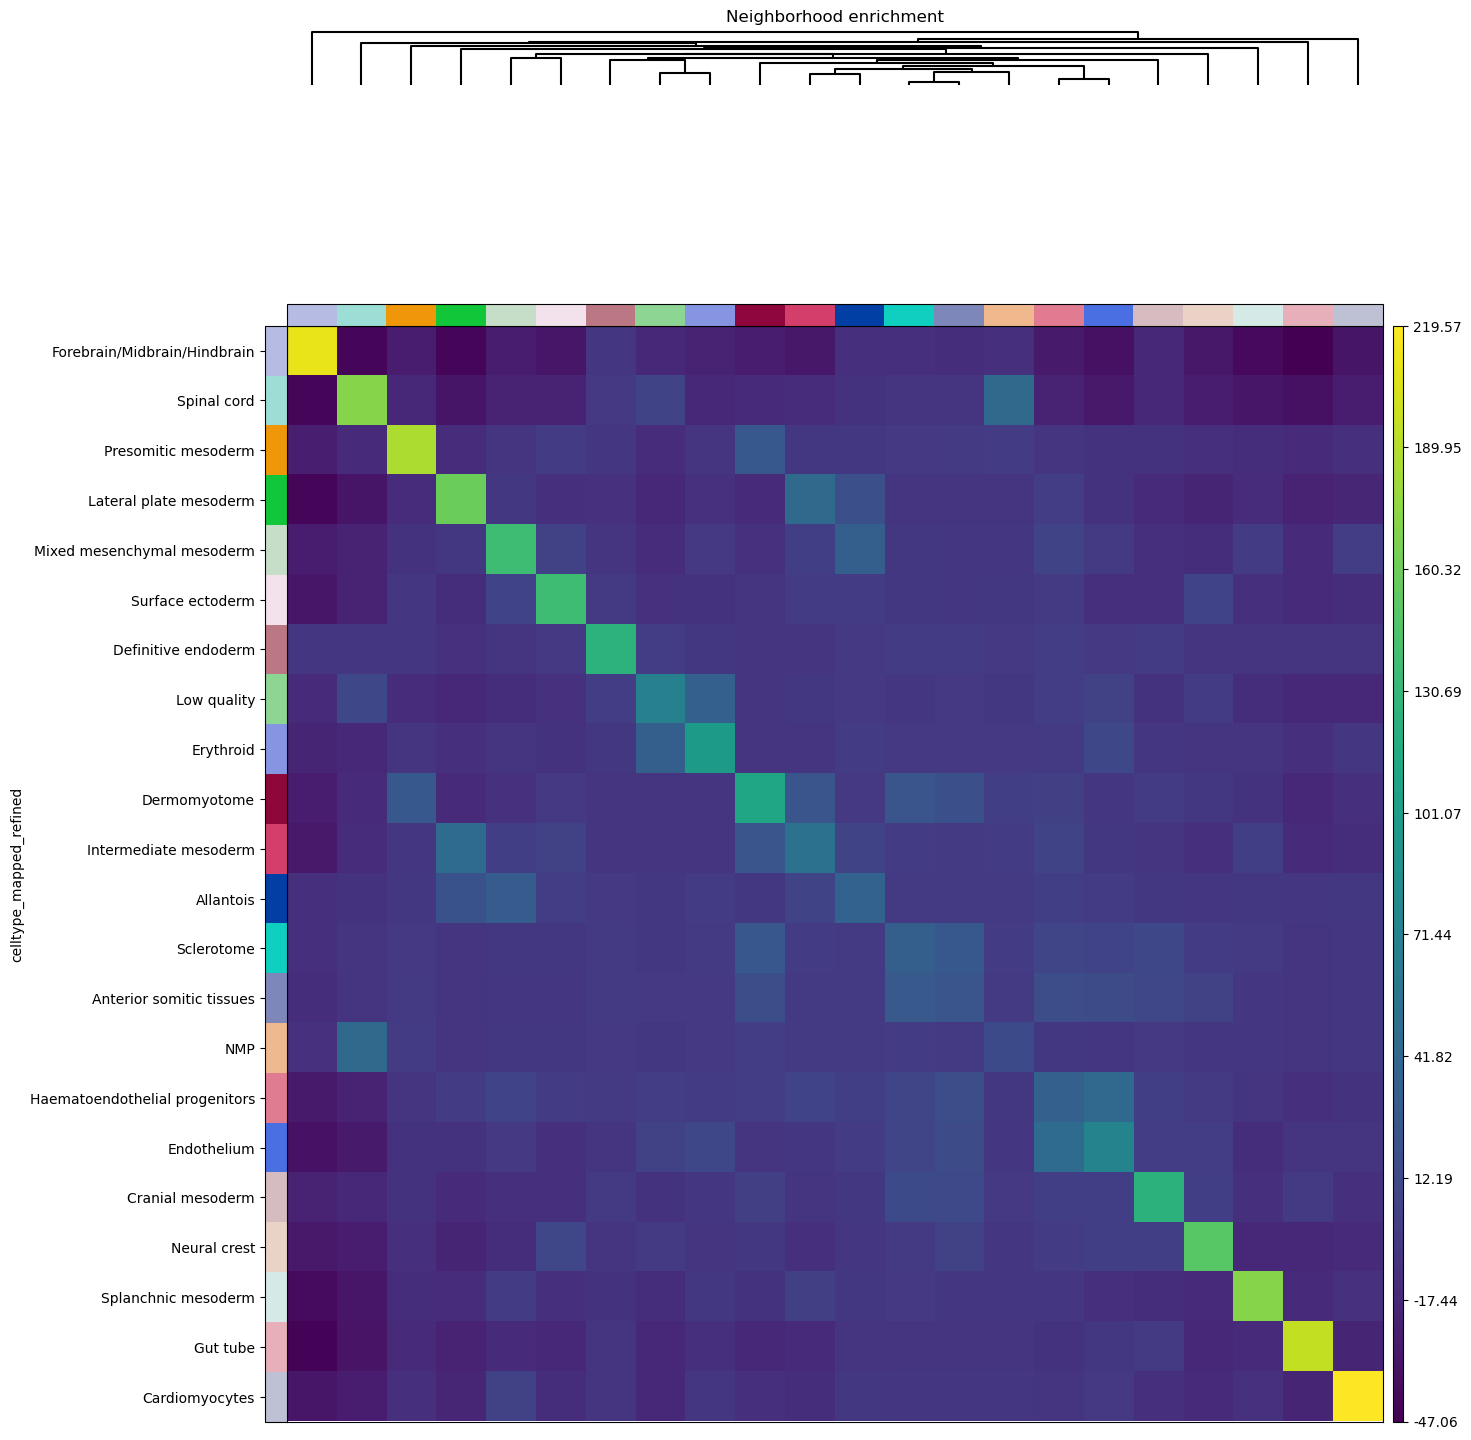

In [5]:
#Neighborhood enrichment analysis
#In short, it’s an enrichment score on spatial proximity of clusters: if spots belonging to two different clusters are often close to each other, then they will have a high score and can be defined as being enriched. 
#On the other hand, if they are far apart, the score will be low and they can be defined as depleted. This score is based on a permutation-based test, and you can set the number of permutations with the n_perms argument (default is 1000).
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="celltype_mapped_refined")
sq.pl.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", method="ward")

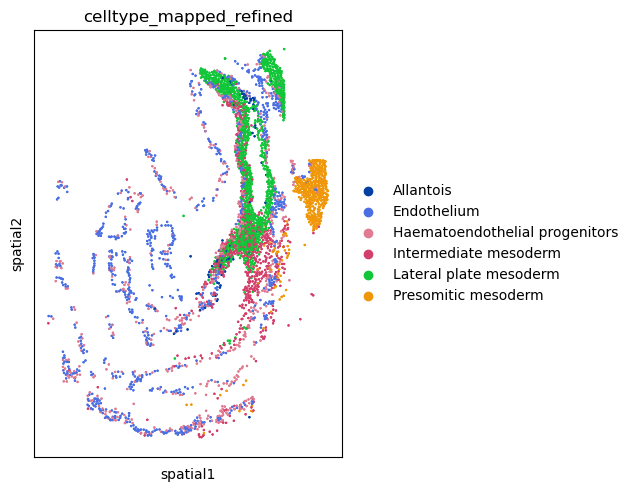

In [6]:
#A similar analysis was performed in the original publication [Lohoff et al., 2020], and we can appreciate to what extent results overlap. For instance, there seems to be an enrichment between the Lateral plate mesoderm, the Intermediate mesoderm and a milder enrichment for Allantois cells. 
#As in the original publication, there also seems to be an association between the Endothelium and the Haematoendothelial progenitors. 
#Of course, results do not perfectly overlap, and this could be due to several factors:the construction of the neighbors graph (which in our case is not informed by the radius, as we did not have access to this information).
#the number of permutation of the neighborhood enrichment (500 in the original publication against the default 1000 in our implementation).
sq.pl.spatial_scatter(
    adata,
    color="celltype_mapped_refined",
    groups=[
        "Endothelium",
        "Haematoendothelial progenitors",
        "Allantois",
        "Lateral plate mesoderm",
        "Intermediate mesoderm",
        "Presomitic mesoderm",
    ],
    shape=None,
    size=2,
)

  0%|          | 0/1 [00:00<?, ?/s]

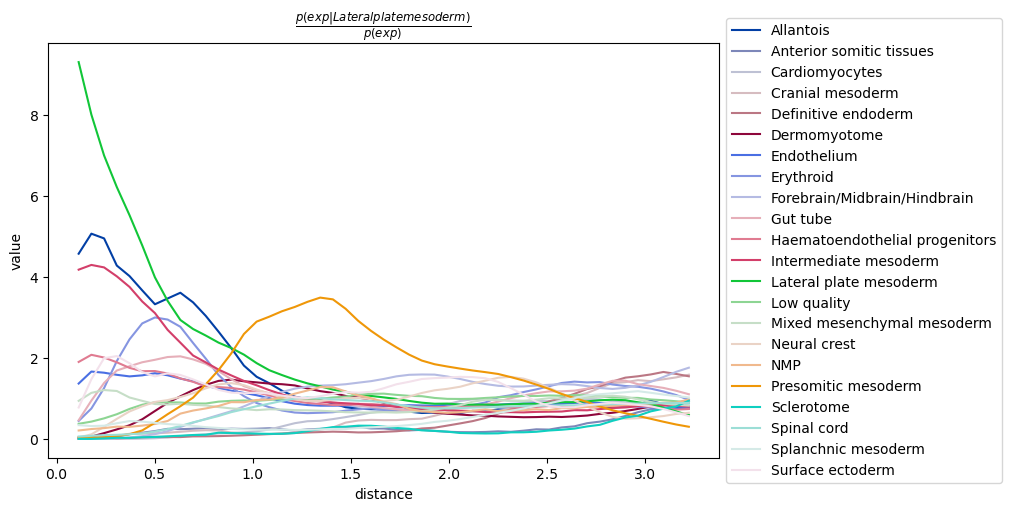

In [7]:
sq.gr.co_occurrence(adata, cluster_key="celltype_mapped_refined")
sq.pl.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
    clusters="Lateral plate mesoderm",
    figsize=(10, 5),
)

0.00B [00:00, ?B/s]

/Users/denverncube/opt/anaconda3/lib/python3.9/site-packages/omnipath/_core/requests/_request.py:39: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  res: pd.DataFrame = callback(*args, **kwargs)


0.00B [00:00, ?B/s]

/Users/denverncube/opt/anaconda3/lib/python3.9/site-packages/omnipath/_core/requests/_request.py:39: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  res: pd.DataFrame = callback(*args, **kwargs)


0.00B [00:00, ?B/s]

/Users/denverncube/opt/anaconda3/lib/python3.9/site-packages/omnipath/_core/requests/_request.py:39: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  res: pd.DataFrame = callback(*args, **kwargs)


  0%|          | 0/100 [00:00<?, ?permutation/s]

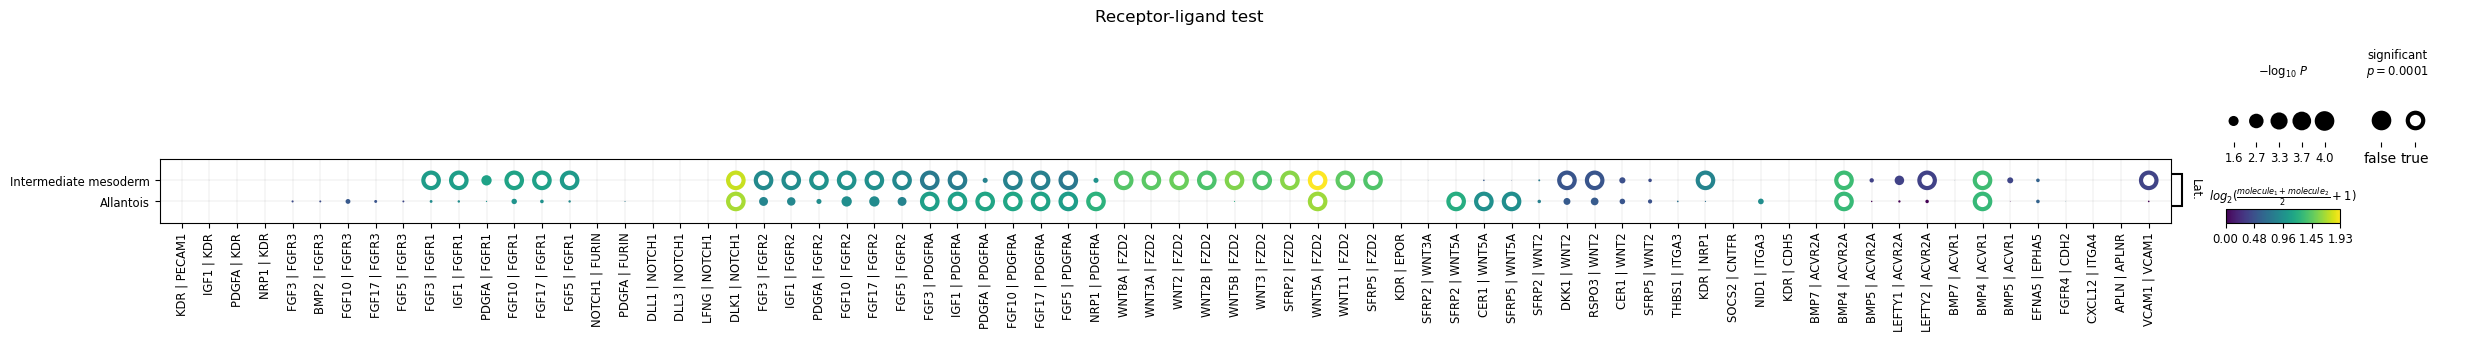

In [8]:
sq.gr.ligrec(
    adata,
    n_perms=100,
    cluster_key="celltype_mapped_refined",
)
sq.pl.ligrec(
    adata,
    cluster_key="celltype_mapped_refined",
    source_groups="Lateral plate mesoderm",
    target_groups=["Intermediate mesoderm", "Allantois"],
    means_range=(0.3, np.inf),
    alpha=1e-4,
    swap_axes=True,
)